In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [18,10]

### Performing element-wise multiplication
Element-wise multiplication in TensorFlow is performed using two tensors with identical shapes. This is because the operation multiplies elements in corresponding positions in the two tensors. An example of an element-wise multiplication, denoted by the ⊙ symbol, is shown below:

$$\begin{bmatrix}
    1 & 2 \\
    2 & 1 
    \end{bmatrix}     \odot  \begin{bmatrix} 3 & 2 \\1 & 5\end{bmatrix}  = \begin{bmatrix}3 & 4 \\2 & 5 \end{bmatrix} $$    


In [4]:
from tensorflow import constant, multiply, ones_like, ones

# Define tensors A1 and A23 as constants
A1 = constant([1, 2, 3, 4])
A23 = constant([[1, 2, 3], [1, 6, 4]])
A23.shape

# Define B1 and B23 to have the correct shape
B1 = ones_like(A1)
B23 = ones_like(A23)

# Perform element-wise multiplication
C1 = multiply(A1, B1)
C23 = multiply(A23, B23)

# Print the tensors C1 and C23
print('C1: {}'.format(C1.numpy()))
print('C23: {}'.format(C23.numpy()))

C1: [1 2 3 4]
C23: [[1 2 3]
 [1 6 4]]


In [5]:
from tensorflow import matmul
# Define features, params, and bill as constants
features = constant([[2, 24], [2, 26], [2, 57], [1, 37]])
params = constant([[1000], [150]])
bill = constant([[3913], [2682], [8617], [64400]])

# Compute billpred using features and params
billpred = matmul(features, params)

# Compute and print the error
error = bill - billpred
print(error.numpy())

[[-1687]
 [-3218]
 [-1933]
 [57850]]


In [6]:
wealth = constant([[11, 50],
       [ 7,  2],
       [ 4, 60],
       [ 3,  0],
       [25, 10]])
wealth

<tf.Tensor: id=15, shape=(5, 2), dtype=int32, numpy=
array([[11, 50],
       [ 7,  2],
       [ 4, 60],
       [ 3,  0],
       [25, 10]], dtype=int32)>

In [7]:
from tensorflow import reduce_sum

w_all = reduce_sum(wealth)
w_all.numpy()

172

In [8]:
w_1 = reduce_sum(wealth, 0)
w_1.numpy()

array([ 50, 122], dtype=int32)

In [9]:
w_2 = reduce_sum(wealth, 1)
w_2.numpy()

array([61,  9, 64,  3, 35], dtype=int32)

### Overview of advanced operations

|Operation|Use|
|---|---|
|`gradient()`| Computes the slope of a function at a point|
|`reshape()`| Reshapes a tensor (eg 10x10 to 100x1) |
|`random()`| Populates tensor with entries drawn from a probabilty distribution | 


- In many problems, we will want to find the optimum of a function
    - **Minimum:** Lowest value of a loss function 
    - **Maximum:** Highest value of objective function 
- We can do this using the `gradient()` operation
    - **Optimum:** Find a point where gradient = 0 
    - **Minimum:** Change in gradient > 0 
    - **Maximum:** Change in gradient < 0 

- In the following graph the gradient is constant

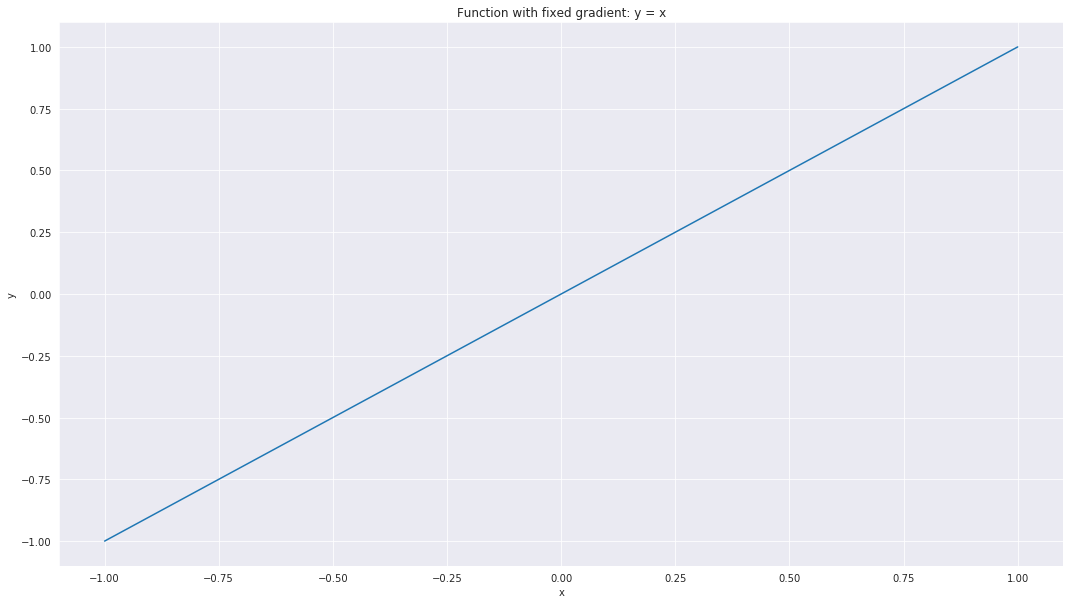

In [10]:
x = np.linspace(-1, 1, 200)
y = x
plt.plot(x,y);
plt.xlabel('x');
plt.ylabel('y');
plt.title('Function with fixed gradient: y = x');

- This is not true for a function with a varying gradient
    - When y is less than zero y decreases when x increases
    - When y is greater than zero y increases when x increases
    - This means x = 0 minimizes y

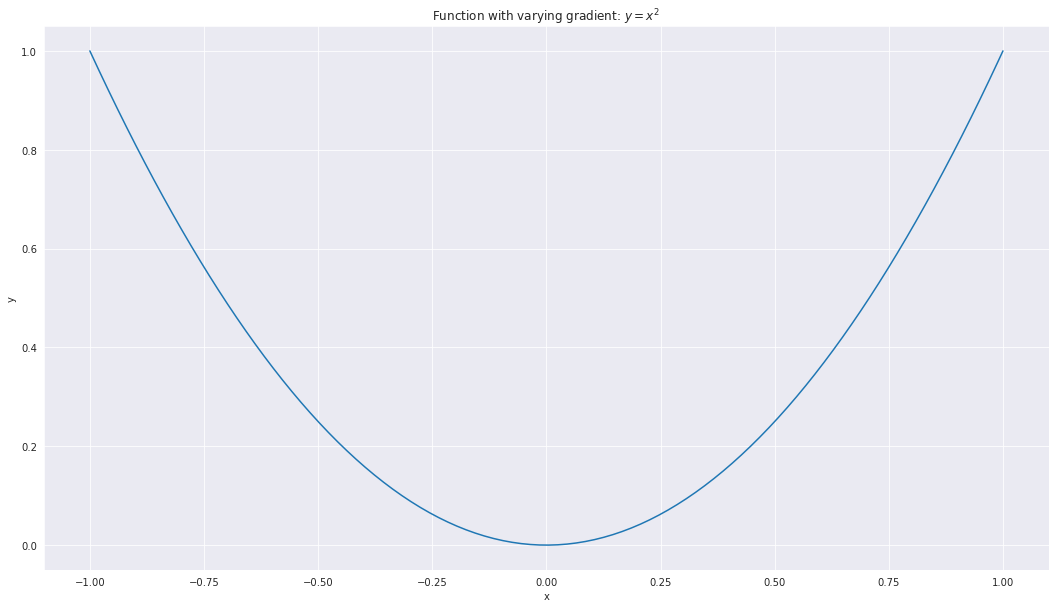

In [11]:
x = np.linspace(-1, 1, 200)
y = x**2
plt.plot(x,y);
plt.xlabel('x');
plt.ylabel('y');
plt.title('Function with varying gradient: $y = x^2$');

In [12]:
import tensorflow as tf

x = tf.Variable(-1.0)

# Define y within instance of GradientTape
with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.multiply(x,x)

In [13]:
# Evaluate the gradient of y at x = -1 
g = tape.gradient(y, x)
print(g.numpy())

-2.0


### Images as tensors

In [27]:
image_string = tf.io.read_file('data/cat.jpeg')
image = tf.image.decode_jpeg(image_string, channels=0)

In [28]:
image.shape

TensorShape([131, 197, 3])

### Reshape a black and white image

In [30]:
gray = tf.random.uniform([2,2], maxval=255, dtype='int32')

# Reshape grayscale image
gray = tf.reshape(gray, [2*2, 1])

### Reshape a color image

In [31]:
color = tf.random.uniform([2,2,3], maxval=225, dtype='int32')

# Reshape color image
color = tf.reshape(color, [2*2, 3])

In [32]:
!../gitbsh #> /dev/null 2>&1

[master a8739ec] 2020-03-04
 3 files changed, 92 insertions(+), 17 deletions(-)
 create mode 100644 tensor_flow/data/color_a.png
 create mode 100644 tensor_flow/data/gray_a.png
Counting objects: 7, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 62.97 KiB | 0 bytes/s, done.
Total 7 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To git@github.com:MikSm1th/datacamp_notes.git
   1e7bfd7..a8739ec  master -> master
Committed: 2020-03-04
